---
title: RIFT slowmotion
execute:
  freeze: true
---

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [3]:
def load_video_and_count_frames(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError("Cannot open the video file")

    # Count the number of frames
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Clean up by releasing the video capture object
    cap.release()

    return frame_count

# Path to your MP4 video file
video_path = '../data/rift_slowmotion.mp4'

# Load the video and count the frames
num_frames = load_video_and_count_frames(video_path)
print(f"The video contains {num_frames} frames.")

The video contains 27968 frames.


In [11]:
# Global variables
bbox = (0, 0, 0, 0)
drawing = False
start_frame = 0
end_frame = 0
current_frame = 0

def draw_rectangle(event, x, y, flags, param):
    global bbox, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        bbox = (x, y, x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            bbox = (bbox[0], bbox[1], x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        bbox = (bbox[0], bbox[1], x, y)

def setup_video_player():
    global start_frame, end_frame, current_frame, bbox
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video stream or file")
        return

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cv2.namedWindow('Video')
    cv2.createTrackbar('Frame', 'Video', 0, total_frames-1, lambda x: None)
    cv2.setMouseCallback('Video', draw_rectangle)

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to retrieve frame")
            break

        frame_copy = frame.copy()
        if bbox and bbox[2] > bbox[0] and bbox[3] > bbox[1]:
            cv2.rectangle(frame_copy, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)

        cv2.imshow('Video', frame_copy)

        current_frame = cv2.getTrackbarPos('Frame', 'Video')
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

        key = cv2.waitKey(25) & 0xFF
        if key == ord('s'):
            start_frame = current_frame
            print(f"Start frame set to: {start_frame}")
        elif key == ord('e'):
            end_frame = current_frame
            print(f"End frame set to: {end_frame}")
        elif key == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

setup_video_player()
print(f"Selected start frame: {start_frame}, end frame: {end_frame}, bounding box: {bbox}")

Start frame set to: 19500
End frame set to: 22344
Selected start frame: 19500, end frame: 22344, bounding box: (492, 307, 510, 337)


In [6]:
sinus_data = (start_frame, end_frame, bbox)
sinus_data = (3284, 4255, (505, 462, 522, 492))
sinus_data

(3284, 4255, (505, 462, 522, 492))

In [12]:
sinus2_data = (start_frame, end_frame, bbox)
sinus2_data = (19500, 22344, (492, 307, 510, 337))
sinus2_data

(19500, 22344, (492, 307, 510, 337))

In [19]:
def calculate_average_luminance(video_path, start_frame, end_frame, bbox):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video stream or file")
        return

    luminances = []

    # Set the video to start frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    for frame_num in range(start_frame, end_frame + 1):
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Extract the bounding box region
        x1, y1, x2, y2 = bbox
        bbox_region = gray_frame[y1:y2, x1:x2]

        # Calculate the average luminance of the bounding box region
        average_luminance = np.mean(bbox_region)
        luminances.append(average_luminance)

    cap.release()
    return luminances

def plot_luminance(luminances):
    plt.figure(figsize=(90, 5))
    plt.plot(luminances, color='blue', marker='o', linestyle='-')
    plt.title('Average Luminance Over Frames')
    plt.xlabel('Frame')
    plt.ylabel('Average Luminance')
    plt.grid(True)
    plt.show()


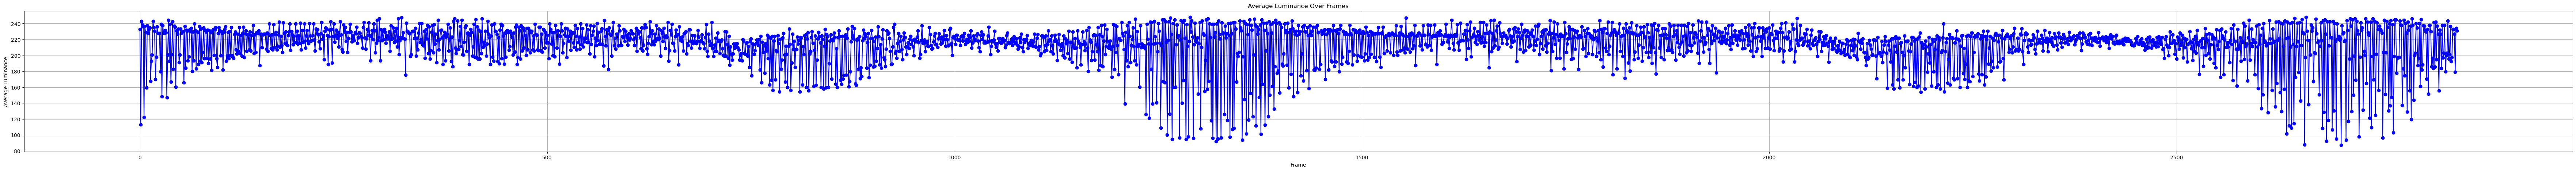

In [20]:
luminances = calculate_average_luminance(video_path, *sinus2_data)
plot_luminance(luminances)